In [1]:
# description: this code uses an ANN called LSTM,to predict the closing stock price of pple Inc. ,using the past 60 day stock proce 
link:   https://www.youtube.com/watch?v=QIUxPv5PJOY&t=745s


In [2]:
# Import library

import math
import pandas_datareader as web
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import  MinMaxScaler
from keras.models import  Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [3]:
df=web.DataReader('AAPL', data_source='yahoo',start='2012-01-01',end='2021-06-05')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672
...,...,...,...,...,...,...
2021-05-28,125.800003,124.550003,125.570000,124.610001,71311100.0,124.610001
2021-06-01,125.349998,123.940002,125.080002,124.279999,67637100.0,124.279999
2021-06-02,125.239998,124.050003,124.279999,125.059998,59278900.0,125.059998


In [4]:
df.shape

(2371, 6)

Text(0, 0.5, 'Close price USD($)')

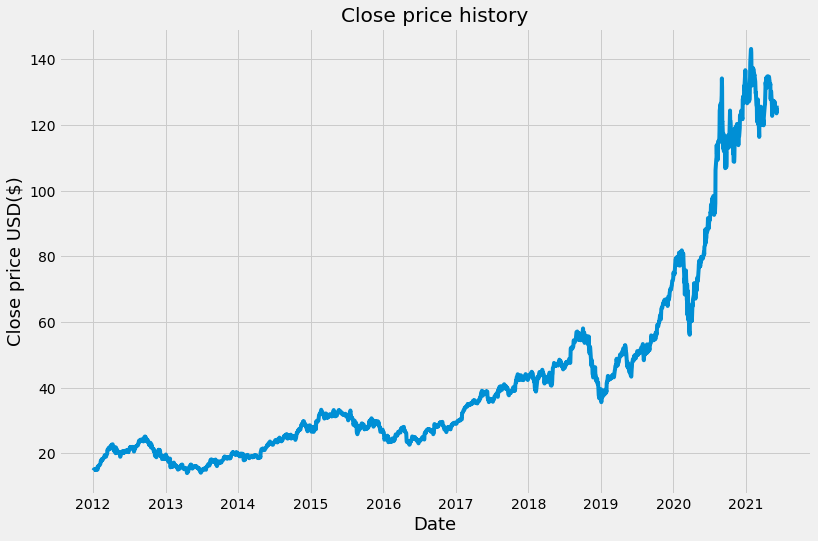

In [5]:
plt.figure(figsize=(12,8))
plt.title("Close price history")
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD($)',fontsize=18)

In [6]:
# create a new data frame only for Close 
data=df.filter(['Close'])
# convert data frame to numpy array
dataset=data.values
training_data_length=math.ceil(len(dataset)*0.8)
training_data_length

1897

In [68]:
#Scale the date
scaler=MinMaxScaler(feature_range=(0,1))
scaler_data=scaler.fit_transform(dataset)
scaler_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.85992063],
       [0.84815709],
       [0.86634417]])

In [8]:
# creating trainig data set
train_data=scaler_data[0:training_data_length,:]
# split to x_train,y_train

x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
 


In [15]:
#convert x_train and y_train into nmpy aray
x_train,y_train=np.array(x_train),np.array(y_train)

In [18]:
# reshape the data 
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1837, 60, 1)

In [25]:
# build the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [28]:
# compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [29]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1837/1837 [==============================] - 50s 23ms/step - loss: 5.4957e-04


In [32]:
# creating testing data set
test_data=scaler_data[training_data_length-60 :,:]
# create x_test,y_test

x_test=[]
y_test=[]
y_test=dataset[training_data_length :,:] ## isnot scaled ,it is normal values
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
 

In [36]:
# conveert the data into the numpy array
x_test=np.array(x_test)

In [39]:
#reshape the data since LSTM espect 3D data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))  #number of time steps 

In [44]:
# get the model predicted price value 
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [47]:
# evalue the model ,get the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(predictions - y_test)**2)
rmse

7.758409958851488

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


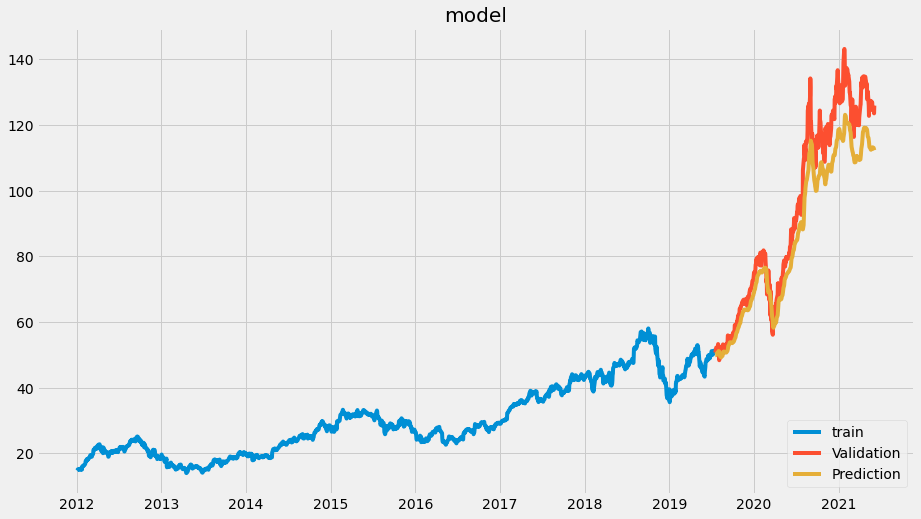

In [64]:
# plot the results
train=data[: training_data_length]
valid=data[training_data_length :]
valid['Prediction']=predictions
plt.figure(figsize=(14,8))
plt.title('model')
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['train','Validation','Prediction'],loc='lower right')
plt.show()


In [65]:
# show the valid and prediction price 
valid

,Close,Prediction
Date,,
2019-07-19,50.647499,49.866722
2019-07-22,51.805000,49.880959
2019-07-23,52.209999,49.980793
2019-07-24,52.167500,50.155235
2019-07-25,51.755001,50.344116
...,...,...
2021-05-28,124.610001,113.193466
2021-06-01,124.279999,113.030518
2021-06-02,125.059998,112.777809


In [73]:
#get the quote 
apple_quote=web.DataReader('AAPL',data_source='yahoo',start='2012-01-02',end='2021-06-06')
# create new dataframe
new_df=apple_quote.filter(['Close'])
#get the last 60 day closing price and convert data frame into an array
last_60_days=new_df[-60 :].values
#scaled the data between 0,1
last_60_days_scaled=scaler.transform(last_60_days)
# create an empty list
X_test=[]
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pre_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pre_price)
print(pred_price)


[[112.256256]]


In [76]:
apple_quote2=web.DataReader('AAPL',data_source='yahoo',start='2021-06-07',end='2021-06-07')
print(apple_quote2['Close'])


Date
2021-06-07    125.385002
Name: Close, dtype: float64


In [ ]:
apple_quote=web.DataReader('AAPL',data_source='yahoo',start='2012-01-02',end='2021-06-06')
